In [3]:
!pip install --upgrade fastai

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/site-packages (1.0.53)
Requirement not upgraded as not directly required: pandas in /usr/local/lib/python3.6/site-packages (from fastai) (0.23.4)
Requirement not upgraded as not directly required: scipy in /usr/local/lib/python3.6/site-packages (from fastai) (1.2.0)
Requirement not upgraded as not directly required: spacy>=2.0.18 in /usr/local/lib/python3.6/site-packages (from fastai) (2.1.3)
Requirement not upgraded as not directly required: numpy>=1.15 in /usr/local/lib/python3.6/site-packages (from fastai) (1.15.4)
Requirement not upgraded as not directly required: packaging in /usr/local/lib/python3.6/site-packages (from fastai) (19.0)
Requirement not upgraded as not directly required: torchvision in /usr/local/lib/python3.6/site-packages (from fastai) (0.3.0)
Requirement not upgraded as not directly required: nvidia-ml-py3 in /usr/local/lib/python3.6/site-packages (from fastai) (7.352.0)
Requirement not upgraded as

In [4]:
!pip install --upgrade torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/site-packages (1.1.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/site-packages (0.3.0)
Requirement not upgraded as not directly required: numpy in /usr/local/lib/python3.6/site-packages (from torch) (1.15.4)
Requirement not upgraded as not directly required: pillow>=4.1.1 in /usr/local/lib/python3.6/site-packages (from torchvision) (5.4.0)
Requirement not upgraded as not directly required: six in /usr/local/lib/python3.6/site-packages (from torchvision) (1.12.0)
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 3.0.2 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.4.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' 

In [1]:
import os

os.chdir(os.pardir)

%reload_ext autoreload
%autoreload 2

In [2]:
from src.dataloaders.data_loader import DataLoader
from src.trainers.trainer import Trainer
from src.evaluators.evaluator import Evaluator

# Hyperparameters

In [12]:
EXP_NAME = 'resnet101'

BATCH_SIZE = 50

IMG_SIZE_1 = 224
IMG_SIZE_2 = 299

N_EPOCHS_1 = 30
LR_1 = 1e-2

N_EPOCHS_2 = 20
LR_2 = slice(1e-5, 1e-3)

N_EPOCHS_3 = 5
LR_3 = 3e-2

N_EPOCHS_4 = 5
LR_4 = slice(1e-4, 1e-3)

# Import Model

In [1]:
from src.models.model_configs import efficient_net_b3_config

ModuleNotFoundError: No module named 'src'

# Load Data

In [7]:
data_loader = DataLoader()
data_bunch = data_loader.get_data_bunch(img_size=IMG_SIZE_1, batch_size=BATCH_SIZE)

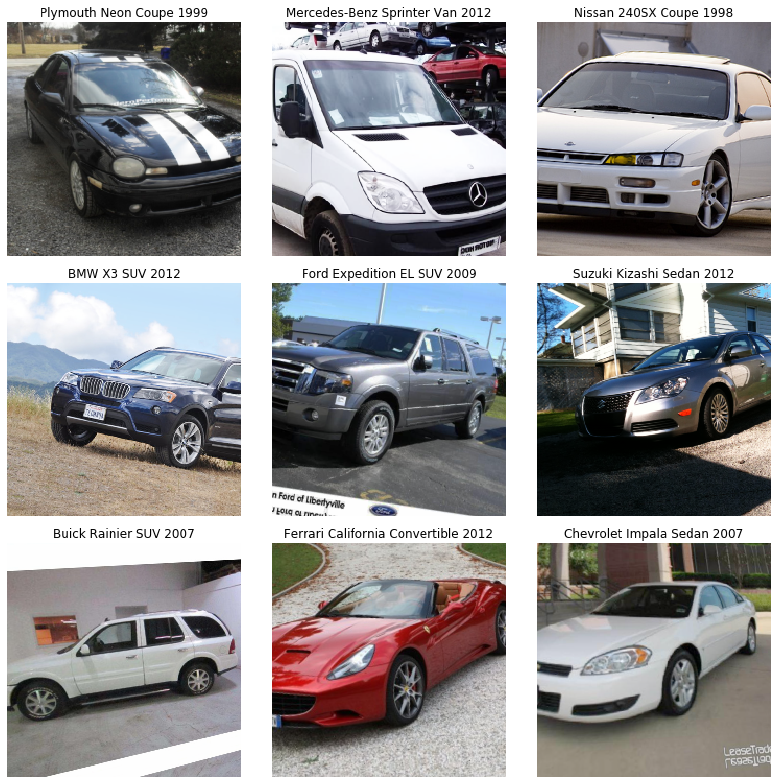

In [19]:
data_bunch.show_batch(rows=3, figsize=(11,11))

# Begin Training

In [8]:
trainer = Trainer(
    data_bunch=data_bunch, 
    mixup=True, 
    exp_name=EXP_NAME,
    **efficient_net_b3_config)

## Stage-1: Transfer Learning

Only train the classifier head first.

In [13]:
import torch
torch.cuda.empty_cache()

In [12]:
trainer.lr_find(freeze=True)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [9]:
trainer.train(n_epochs=N_EPOCHS_1, max_lr=LR_1, freeze=True, name='1_50bs_30e')

epoch,train_loss,valid_loss,accuracy,time
0,5.167144,4.008100,0.154082,03:34
1,4.266492,2.945109,0.305095,03:21
2,3.672989,2.466043,0.383057,03:21
3,3.436988,2.673102,0.354819,03:21
4,3.449192,2.546078,0.367710,03:20
5,3.349119,2.757976,0.344997,03:22
6,3.253047,2.379297,0.402087,03:22
7,3.183669,2.189932,0.438306,03:21
8,3.085954,2.108386,0.451811,03:21
9,2.994557,2.001332,0.475752,03:21


Better model found at epoch 0 with valid_loss value: 4.0081000328063965.
Better model found at epoch 1 with valid_loss value: 2.9451093673706055.
Better model found at epoch 2 with valid_loss value: 2.4660427570343018.
Better model found at epoch 6 with valid_loss value: 2.3792967796325684.
Better model found at epoch 7 with valid_loss value: 2.189931869506836.
Better model found at epoch 8 with valid_loss value: 2.1083860397338867.
Better model found at epoch 9 with valid_loss value: 2.0013318061828613.
Better model found at epoch 10 with valid_loss value: 1.6420211791992188.
Better model found at epoch 12 with valid_loss value: 1.5583500862121582.
Better model found at epoch 14 with valid_loss value: 1.3132859468460083.
Better model found at epoch 15 with valid_loss value: 1.175528883934021.
Better model found at epoch 16 with valid_loss value: 1.1702462434768677.
Better model found at epoch 17 with valid_loss value: 1.0636261701583862.
Better model found at epoch 18 with valid_loss 

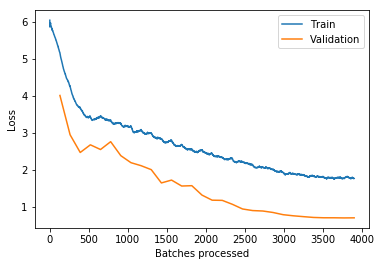

In [10]:
trainer.plot_losses()

## Stage-2: Fine-tuning

Unfreeze all layers and train with discriminative layer training.

In [ ]:
trainer.load_weights('1_30e')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.25E-06


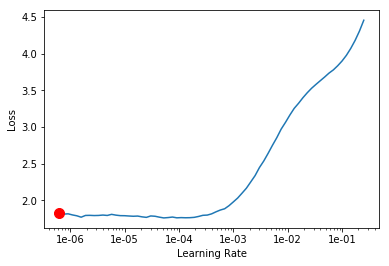

In [11]:
trainer.lr_find(freeze=False)

In [14]:
trainer.train(n_epochs=N_EPOCHS_2, max_lr=LR_2, freeze=False, name='2_50bs_20e')

epoch,train_loss,valid_loss,accuracy,time
0,1.756736,0.689026,0.826888,04:19
1,1.790643,0.707083,0.815838,04:19
2,1.833084,0.819641,0.784530,04:19
3,1.887769,0.830601,0.789441,04:19
4,1.974796,0.943786,0.760589,04:19
5,1.943553,0.874886,0.772253,04:20
6,1.904533,0.791045,0.780233,04:19
7,1.868804,0.820518,0.784530,04:20
8,1.847159,0.735133,0.799263,04:19
9,1.769214,0.685958,0.821977,04:20


Better model found at epoch 0 with valid_loss value: 0.6890263557434082.
Better model found at epoch 9 with valid_loss value: 0.685958206653595.
Better model found at epoch 10 with valid_loss value: 0.6545240879058838.
Better model found at epoch 11 with valid_loss value: 0.6315967440605164.
Better model found at epoch 12 with valid_loss value: 0.5762808918952942.
Better model found at epoch 14 with valid_loss value: 0.5510619878768921.
Better model found at epoch 15 with valid_loss value: 0.5309882760047913.
Better model found at epoch 17 with valid_loss value: 0.521743893623352.
Better model found at epoch 18 with valid_loss value: 0.517599880695343.
Better model found at epoch 19 with valid_loss value: 0.5147204995155334.


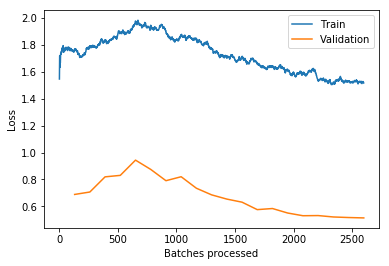

In [15]:
trainer.plot_losses()

## Stage-3: Increased Image Size - Transfer Learning

Perform transfer learning on increased image size.

In [20]:
trainer.load_weights('2_20e')

In [9]:
data_bunch = data_loader.get_data_bunch(img_size=IMG_SIZE_2, batch_size=20)
data_bunch.train_ds[0][0].shape

torch.Size([3, 299, 299])

In [10]:
trainer.set_data_bunch(data_bunch)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


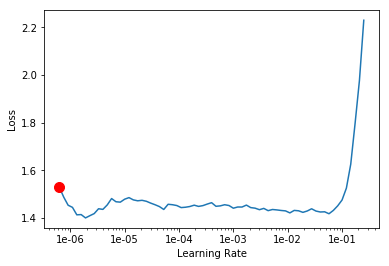

In [11]:
trainer.lr_find(freeze=True)

In [ ]:
trainer.train(n_epochs=N_EPOCHS_3, max_lr=LR_3, freeze=True)

In [ ]:
trainer.save_weights('3')

## Stage-4: Increased Image Size - Fine-tuning

Finally, squeeze out as much performance as possible by one last fine-tuning.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


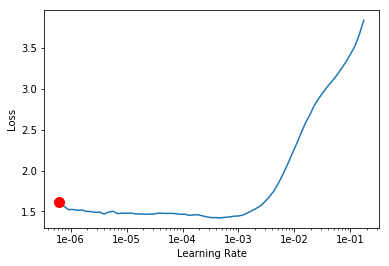

In [12]:
trainer.lr_find(freeze=False)

In [15]:
trainer.train(n_epochs=N_EPOCHS_4, max_lr=LR_4, freeze=False, name='3_5e')

epoch,train_loss,valid_loss,accuracy,time
0,1.657544,0.861129,0.801105,12:43


Better model found at epoch 0 with val_loss value: 0.8611294031143188.


Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/local/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
Traceback (most recent call last):
  File "/usr/local/lib/python3

KeyboardInterrupt: 

In [ ]:
trainer.plot_losses()

In [ ]:
trainer.save_weights('3_5e')

## Export Learner/Model

In [16]:
trainer.export()

# Evaluation

In [22]:
interp = ClassificationInterpretation.from_learner(trainer.learn)

NameError: name 'ClassificationInterpretation' is not defined

In [ ]:
most_confused = interp.most_confused()

In [ ]:
most_confused

In [18]:
evaluator = Evaluator(
    learn_name=EXP_NAME,
    tta=False,
    exp_name=EXP_NAME
)

In [17]:
evaluator = Evaluator(
    learn_name=EXP_NAME,
    tta=True,
    exp_name=(EXP_NAME + '_tta')
)

In [27]:
evaluator.get_metrics()

(0.9006342494714588,
 0.9006342494714588,
 0.9006342494714588,
 0.9006342494714588)